In [1]:
import importlib
import utils

In [2]:
importlib.reload(utils)

<module 'utils' from 'C:\\Users\\WIKTORIA\\Desktop\\TheCoctails-ML\\utils\\__init__.py'>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.read_data import read_data_function
from utils.tags import count_tags, tags_in_categories
from utils.ingredients import get_unique_ingredients_names, count_drinks_with_ingredient, process_ingredients
from utils.plots import total_category_drinks, the_most_commonly_ingredients, types_of_glass
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder

# READING JSON FILE 'COCKTAIL DATASET'

In [11]:
data = read_data_function('cocktail_dataset.json')
print(data[0])

{'id': 11000, 'name': 'Mojito', 'category': 'Cocktail', 'glass': 'Highball glass', 'tags': ['IBA', 'ContemporaryClassic', 'Alcoholic', 'USA', 'Asia', 'Vegan', 'Citrus', 'Brunch', 'Hangover', 'Mild'], 'instructions': 'Muddle mint leaves with sugar and lime juice. Add a splash of soda water and fill the glass with cracked ice. Pour the rum and top with soda water. Garnish and serve with straw.', 'imageUrl': 'https://cocktails.solvro.pl/images/ingredients/mojito.png', 'alcoholic': 1, 'createdAt': '2024-08-18T19:01:17.000+00:00', 'updatedAt': '2024-08-18T19:06:16.000+00:00', 'ingredients': [{'id': 170, 'name': 'Soda water', 'description': None, 'alcohol': 1, 'type': None, 'percentage': None, 'imageUrl': None, 'createdAt': '2024-08-18T19:01:57.000+00:00', 'updatedAt': '2024-08-18T19:01:57.000+00:00'}, {'id': 305, 'name': 'Light Rum', 'description': 'Light rums, also referred to as "silver" or "white" rums, in general, have very little flavor aside from a general sweetness. Light rums are so

Variable type check: 'data'

In [12]:
print(type(data)) 

<class 'list'>


CHANGING THE LIST TO A DATAFRAME

In [13]:
df = pd.DataFrame(data)

What features of the drinks can we read from the dataset?

In [14]:
print('Features of the drinks')
for category in df.columns:
    print(f"-> {category}")

Features of the drinks
-> id
-> name
-> category
-> glass
-> tags
-> instructions
-> imageUrl
-> alcoholic
-> createdAt
-> updatedAt
-> ingredients


# EXPLORATORY DATA ANALYSIS

EDA involves examining a dataset to understand its structure, patterns, and relationships through summary statistics and visualizations. It helps in identifying key insights, anomalies, and potential issues before proceeding with more advanced analysis or modeling (for this task: clustering)

__Number of drinks__

In [15]:
number_of_drinks = len(data)
print(f"Number of drinks in the dataset: {number_of_drinks}")

Number of drinks in the dataset: 134


__Missing values__

In [21]:
missing_values = df.isnull().sum()
print("Number of missing values in each feature")
print(missing_values)

Number of missing values in each feature
id               0
name             0
category         0
glass            0
tags            99
instructions     0
imageUrl         0
alcoholic        0
createdAt        0
updatedAt        0
ingredients      0
dtype: int64


__DATA PREVIEW__

In [22]:
df.head(1)

,id,name,category,glass,tags,instructions,imageUrl,alcoholic,createdAt,updatedAt,ingredients
0,11000,Mojito,Cocktail,Highball glass,"[IBA, ContemporaryClassic, Alcoholic, USA, Asi...",Muddle mint leaves with sugar and lime juice. ...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:17.000+00:00,2024-08-18T19:06:16.000+00:00,"[{'id': 170, 'name': 'Soda water', 'descriptio..."


__Unique values in the columns__

In [24]:
unique_categories = df['category'].unique()
unique_glass_types = df['glass'].unique()
unique_tags = df['tags'].apply(lambda x: x if isinstance(x, list) else []).explode().unique()

print("Unique values in the column 'category':")
print(unique_categories)
print("\nUnique values in the column 'glass':")
print(unique_glass_types)
print("\nUnique values in the column 'tags':")
print(unique_tags)

Unique values in the column 'category':
['Cocktail' 'Ordinary Drink' 'Punch / Party Drink']

Unique values in the column 'glass':
['Highball glass' 'Old-fashioned glass' 'Cocktail glass' 'Copper Mug'
 'Whiskey Glass' 'Collins glass' 'Pousse cafe glass' 'Champagne flute'
 'Whiskey sour glass' 'Brandy snifter' 'White wine glass']

Unique values in the column 'tags':
['IBA' 'ContemporaryClassic' 'Alcoholic' 'USA' 'Asia' 'Vegan' 'Citrus'
 'Brunch' 'Hangover' 'Mild' 'Classic' 'Expensive' 'Savory' 'Strong'
 'StrongFlavor' 'Vegetarian' 'Sour' 'Christmas' 'Beach' 'DinnerParty' nan
 'Summer' 'Chilli' 'Dairy' 'Nutty' 'Cold' 'Fruity' 'Breakfast' 'NewEra']


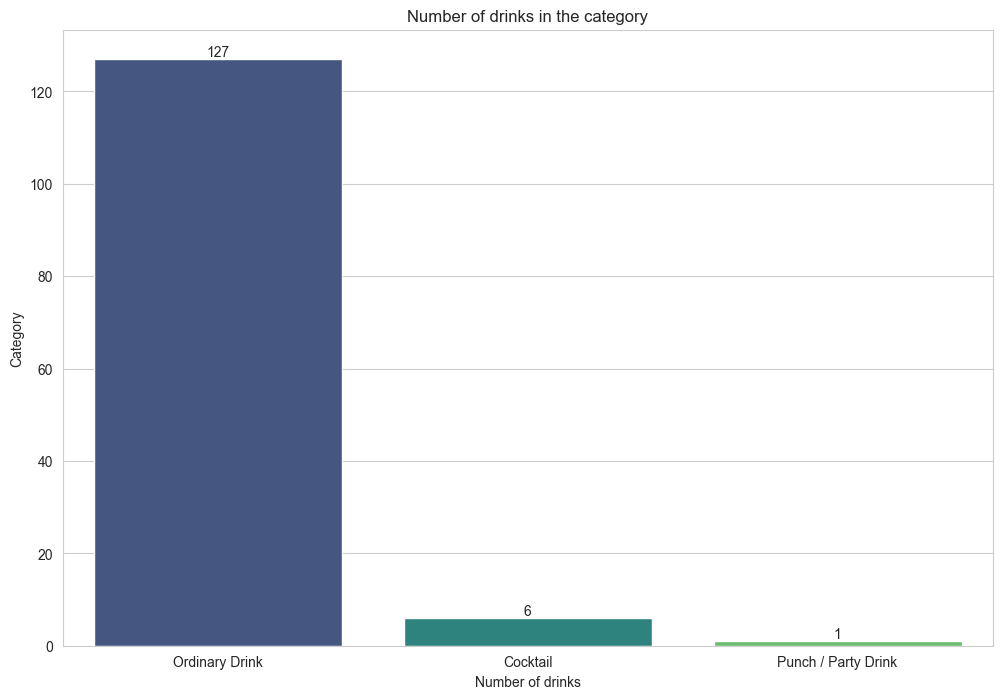

In [25]:
total_category_drinks(df)

                    Tag  Count
0                   IBA     23
1   ContemporaryClassic     13
2             Alcoholic      6
3                   USA      1
4                  Asia      2
5                 Vegan      1
6                Citrus      2
7                Brunch      3
8              Hangover      2
9                  Mild      1
10              Classic      9
11            Expensive      1
12               Savory      1
13               Strong      1
14         StrongFlavor      2
15           Vegetarian      1
16                 Sour      2
17            Christmas      1
18                Beach      3
19          DinnerParty      1
20               Summer      1
21               Chilli      1
22                Dairy      2
23                Nutty      1
24                 Cold      1
25               Fruity      1
26            Breakfast      1
27               NewEra      1


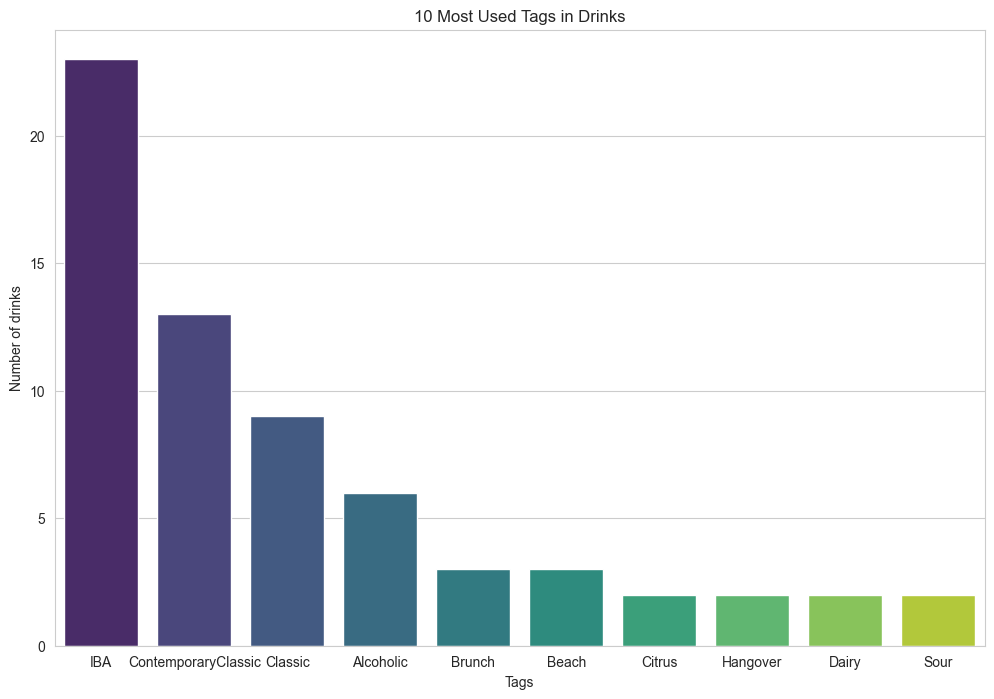

In [26]:
tag_counts = count_tags(df)

tag_df = pd.DataFrame(tag_counts.items(), columns=['Tag', 'Count'])
print(tag_df)
top_tags_df = tag_df.sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_tags_df, x='Tag', y='Count', hue='Tag', palette='viridis', legend=False)
plt.title('10 Most Used Tags in Drinks')
plt.xlabel('Tags')
plt.ylabel('Number of drinks')
plt.show()

__UNIQUE INGREDIENTS__

In [28]:
unique_ingredients = get_unique_ingredients_names(df)
print("Drink ingredients:")
for ingredient in sorted(unique_ingredients):
    print(f"-> {ingredient}")

Drink ingredients:
-> Amaretto
-> Angostura Bitters
-> Apple Brandy
-> Applejack
-> Apricot Brandy
-> Añejo Rum
-> Banana
-> Benedictine
-> Bitters
-> Blackberry Brandy
-> Blended Whiskey
-> Blue Curacao
-> Bourbon
-> Brandy
-> Cachaca
-> Campari
-> Carbonated Water
-> Celery Salt
-> Champagne
-> Cherry
-> Cherry Brandy
-> Chocolate Ice-cream
-> Club Soda
-> Coca-Cola
-> Coffee Brandy
-> Coffee Liqueur
-> Cognac
-> Creme De Cacao
-> Dark Rum
-> Drambuie
-> Dry Vermouth
-> Dubonnet Rouge
-> Egg
-> Egg White
-> Egg Yolk
-> Galliano
-> Gin
-> Ginger Ale
-> Grand Marnier
-> Grapefruit Juice
-> Green Chartreuse
-> Green Creme de Menthe
-> Grenadine
-> Heavy cream
-> Ice
-> Irish Whiskey
-> Kahlua
-> Kummel
-> Lemon Juice
-> Lemon Peel
-> Lemon vodka
-> Lemon-lime soda
-> Lemonade
-> Light Cream
-> Light Rum
-> Lime
-> Lime Juice
-> Lime vodka
-> Maraschino Cherry
-> Maraschino Liqueur
-> Mint
-> Nutmeg
-> Olive
-> Orange
-> Orange Bitters
-> Orange Juice
-> Orange Peel
-> Orange spiral
-> O

__Number of drinks with a given ingredient__

In [30]:
ingredient_drink_counts = count_drinks_with_ingredient(df)

print("Number of drinks with a given ingredient")
for ingredient, count in sorted(ingredient_drink_counts.items(), key=lambda item: item[1], reverse=True):
    print(f"{ingredient}: {count}")

Number of drinks with a given ingredient
Gin: 45
Light Rum: 20
Triple Sec: 20
Sugar: 19
Lemon Juice: 19
lemon: 17
Powdered Sugar: 17
Lemon Peel: 17
Lime: 15
Dry Vermouth: 14
Carbonated Water: 13
Vodka: 12
Sweet Vermouth: 12
Cherry: 12
Amaretto: 12
Light Cream: 12
Brandy: 12
Bourbon: 11
Lime Juice: 11
Bitters: 11
Grenadine: 10
Maraschino Cherry: 9
Orange: 9
Blended Whiskey: 8
Egg White: 8
Scotch: 7
Creme De Cacao: 6
Benedictine: 6
Water: 5
Apricot Brandy: 5
Orange Bitters: 5
Nutmeg: 5
Pineapple Juice: 5
Club Soda: 5
Tequila: 4
Dark Rum: 4
Orange Juice: 4
Maraschino Liqueur: 4
Port: 4
Mint: 3
Olive: 3
Ginger Ale: 3
Sloe Gin: 3
Kahlua: 3
Blue Curacao: 3
Pineapple: 3
Angostura Bitters: 2
Coca-Cola: 2
Salt: 2
Orange Peel: 2
Ice: 2
Yellow Chartreuse: 2
Apple Brandy: 2
Wine: 2
Champagne: 2
Green Creme de Menthe: 2
Tomato Juice: 2
Tabasco Sauce: 2
Tia Maria: 2
Egg: 2
Cherry Brandy: 2
Orange spiral: 2
Heavy cream: 2
Sweet and Sour: 2
Red Wine: 2
Sherry: 2
Soda water: 1
Campari: 1
Southern Comfo

__GRAPH OF THE NUMBER OF DRINKS WITH INGREDIENTS__

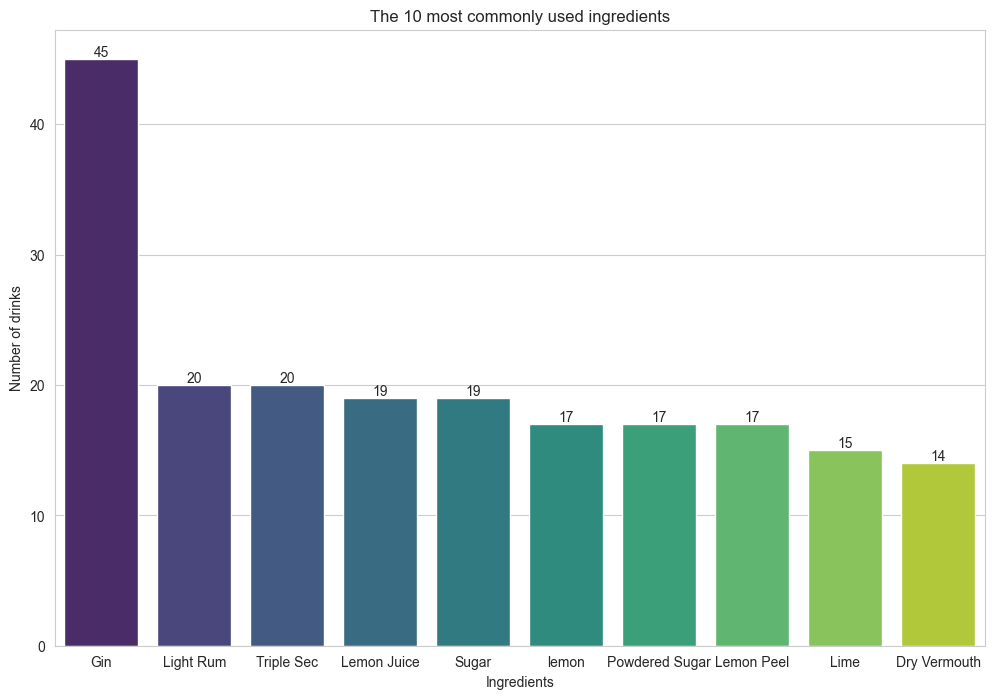

In [31]:
ingredient_df = pd.DataFrame(ingredient_drink_counts.items(), columns=['Ingredient', 'Count'])

top_ingredients_df = ingredient_df.sort_values(by='Count', ascending=False).head(10)

the_most_commonly_ingredients(top_ingredients_df)

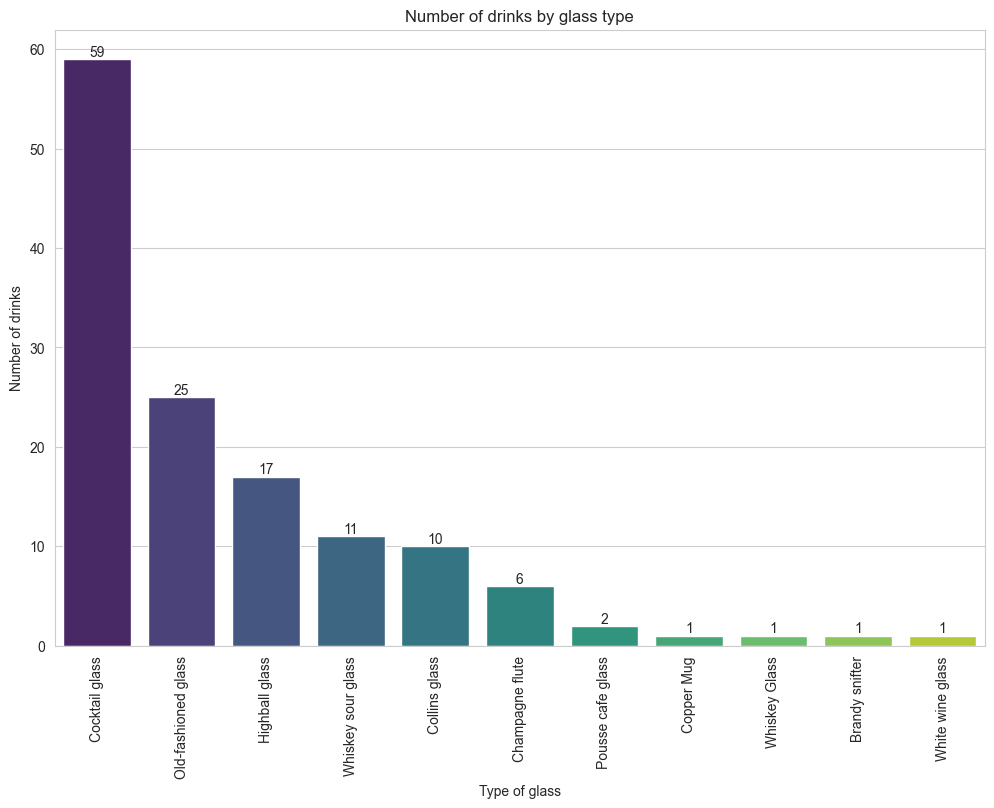

In [22]:
glass_counts = df['glass'].value_counts()

glass_df = glass_counts.reset_index()
glass_df.columns = ['Glass', 'Count']

types_of_glass(glass_df)

## Correlation between drink category and tag

In [32]:
df['tags'].head()

0    [IBA, ContemporaryClassic, Alcoholic, USA, Asi...
1         [IBA, Classic, Alcoholic, Expensive, Savory]
2    [Strong, Asia, StrongFlavor, Brunch, Vegetaria...
3                                       [IBA, Classic]
4       [IBA, Classic, Alcoholic, ContemporaryClassic]
Name: tags, dtype: object

In [33]:
category_tags_df = tags_in_categories(df)
category_tags_df.head()

,Tag,Cocktail,Ordinary Drink,Punch / Party Drink
0,IBA,4.0,18.0,1.0
1,ContemporaryClassic,1.0,11.0,1.0
2,Alcoholic,4.0,2.0,0.0
3,USA,1.0,0.0,0.0
4,Asia,1.0,1.0,0.0


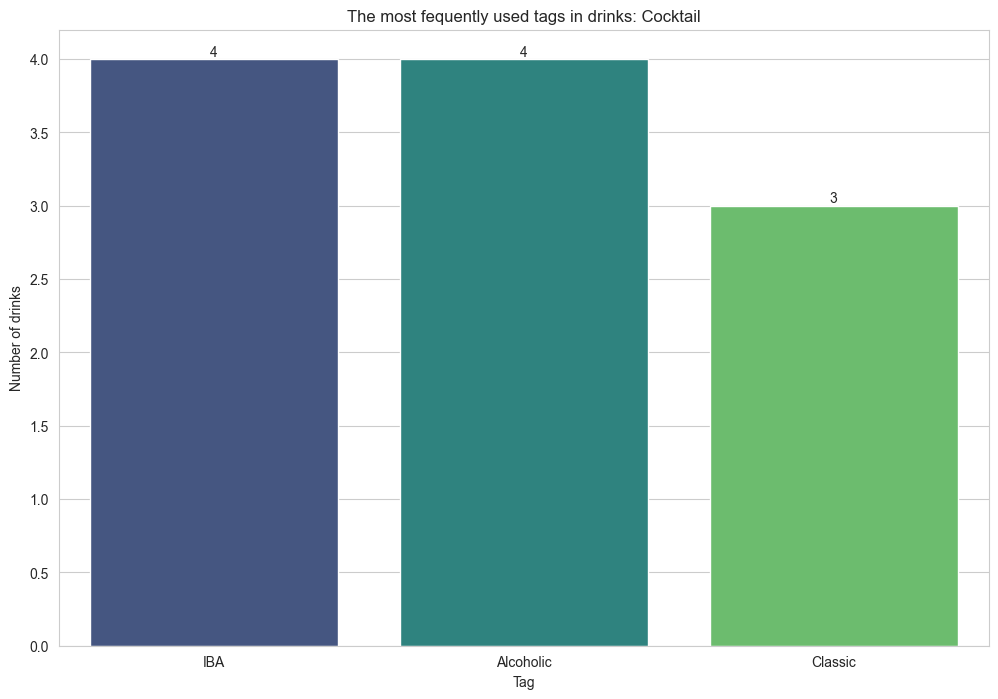

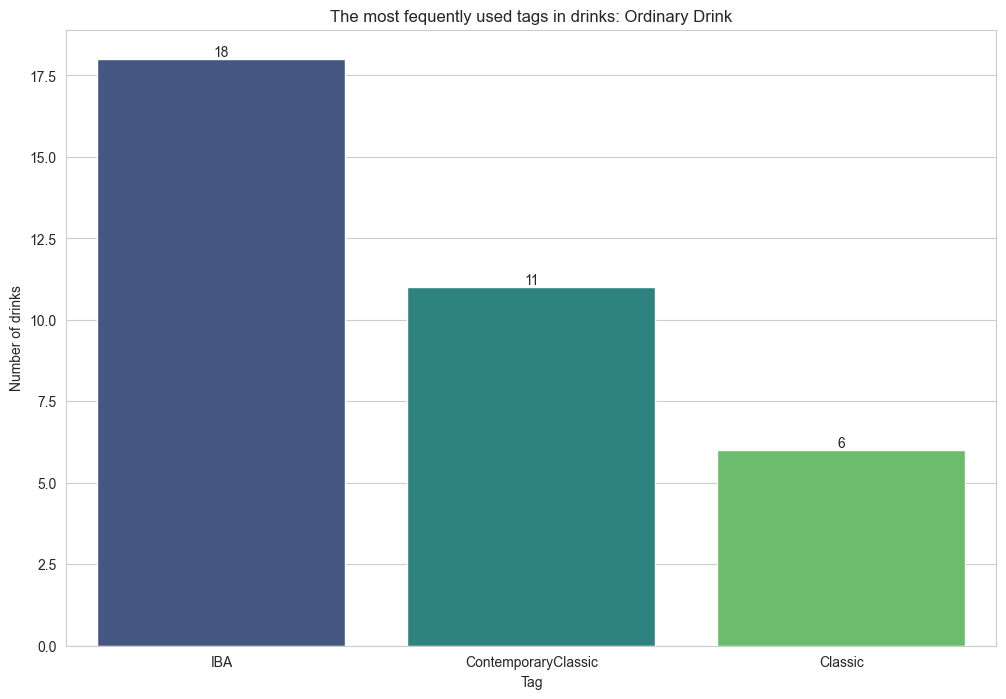

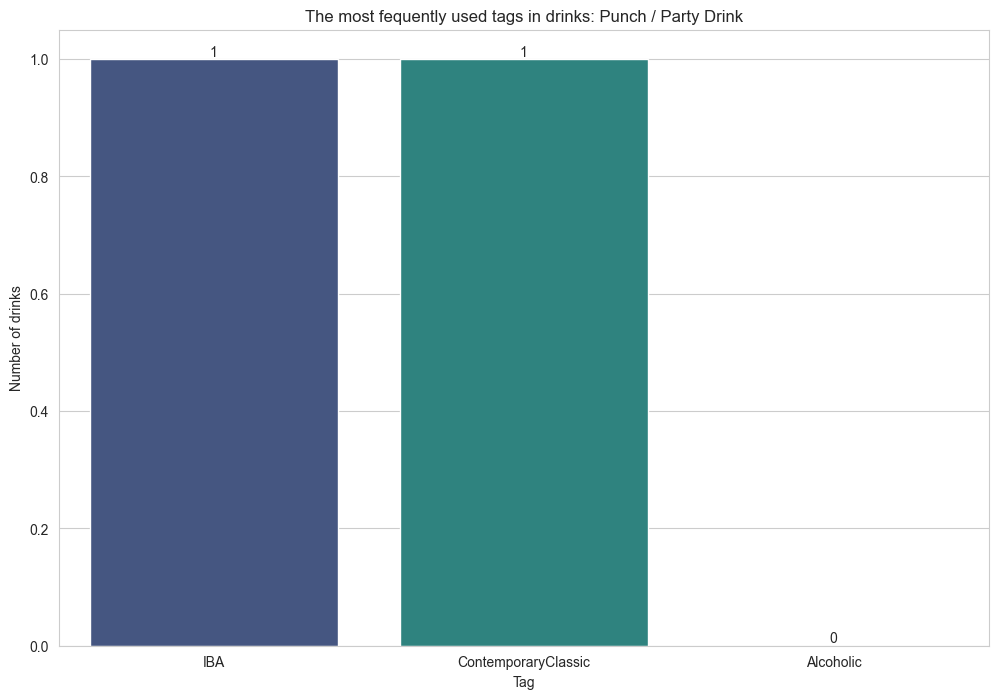

In [34]:
from utils.plots import tags_in_categories_plot
tags_in_categories_plot(category_tags_df)

To calculate correlations between features, you need to convert the columns to the appriopriate format:

__ONE-HOT ENCODING__
1)'category', 'glass'


In [35]:
ohe = OneHotEncoder(sparse_output=False)

encoded_category_glass = ohe.fit_transform(df[['category', 'glass']])

df_ohe = pd.DataFrame(encoded_category_glass, columns=ohe.get_feature_names_out(['category', 'glass']))
df_ohe.head()

,category_Cocktail,category_Ordinary Drink,category_Punch / Party Drink,glass_Brandy snifter,glass_Champagne flute,glass_Cocktail glass,glass_Collins glass,glass_Copper Mug,glass_Highball glass,glass_Old-fashioned glass,glass_Pousse cafe glass,glass_Whiskey Glass,glass_Whiskey sour glass,glass_White wine glass
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [36]:
df_ingredients = df['ingredients'].apply(process_ingredients)

df_ingredients.head()

0           [Soda water, Light Rum, Lime, Mint, Sugar]
1           [Water, Sugar, Angostura Bitters, Bourbon]
2    [Light Rum, lemon, Vodka, Gin, Tequila, Coca-C...
3                       [Sweet Vermouth, Gin, Campari]
4     [Powdered Sugar, lemon, Blended Whiskey, Cherry]
Name: ingredients, dtype: object

In [37]:
mlb = MultiLabelBinarizer()
ingredients_encoded = pd.DataFrame(mlb.fit_transform(df_ingredients), columns=mlb.classes_)
ingredients_encoded.head()

,Amaretto,Angostura Bitters,Apple Brandy,Applejack,Apricot Brandy,Añejo Rum,Banana,Benedictine,Bitters,Blackberry Brandy,...,Tonic Water,Triple Sec,Vodka,Water,Whipped Cream,White Creme de Menthe,Wine,Worcestershire Sauce,Yellow Chartreuse,lemon
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


___ONE-HOT ENCODING___ 
2)tags

In [38]:
df_tags = df['tags'].apply(lambda x: x if isinstance(x, list) else [])

In [39]:
mlb_tags = MultiLabelBinarizer()
tags_encoded = pd.DataFrame(mlb_tags.fit_transform(df_tags), columns=mlb_tags.classes_)

In [40]:
tags_encoded.head()

,Alcoholic,Asia,Beach,Breakfast,Brunch,Chilli,Christmas,Citrus,Classic,Cold,...,NewEra,Nutty,Savory,Sour,Strong,StrongFlavor,Summer,USA,Vegan,Vegetarian
0,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Combine all encoded columns into a data frame

In [41]:
df_encoded = pd.concat([df_ohe, df['alcoholic'], ingredients_encoded, tags_encoded], axis=1)
df_encoded.head(2)

,category_Cocktail,category_Ordinary Drink,category_Punch / Party Drink,glass_Brandy snifter,glass_Champagne flute,glass_Cocktail glass,glass_Collins glass,glass_Copper Mug,glass_Highball glass,glass_Old-fashioned glass,...,NewEra,Nutty,Savory,Sour,Strong,StrongFlavor,Summer,USA,Vegan,Vegetarian
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,1,1,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0


__Example visualization of the correlation matrix__

                              category_Cocktail  category_Ordinary Drink  \
category_Cocktail                      1.000000                -0.922197   
category_Ordinary Drink               -0.922197                 1.000000   
category_Punch / Party Drink          -0.018773                -0.369341   
glass_Brandy snifter                  -0.018773                 0.020357   
glass_Champagne flute                 -0.046875                 0.050830   
glass_Cocktail glass                   0.098727                -0.062015   
glass_Collins glass                   -0.061484                 0.066671   
glass_Copper Mug                      -0.018773                -0.369341   
glass_Highball glass                   0.025891                -0.011280   
glass_Old-fashioned glass             -0.011060                 0.026342   
glass_Pousse cafe glass               -0.026650                 0.028898   
glass_Whiskey Glass                   -0.018773                 0.020357   
glass_Whiske

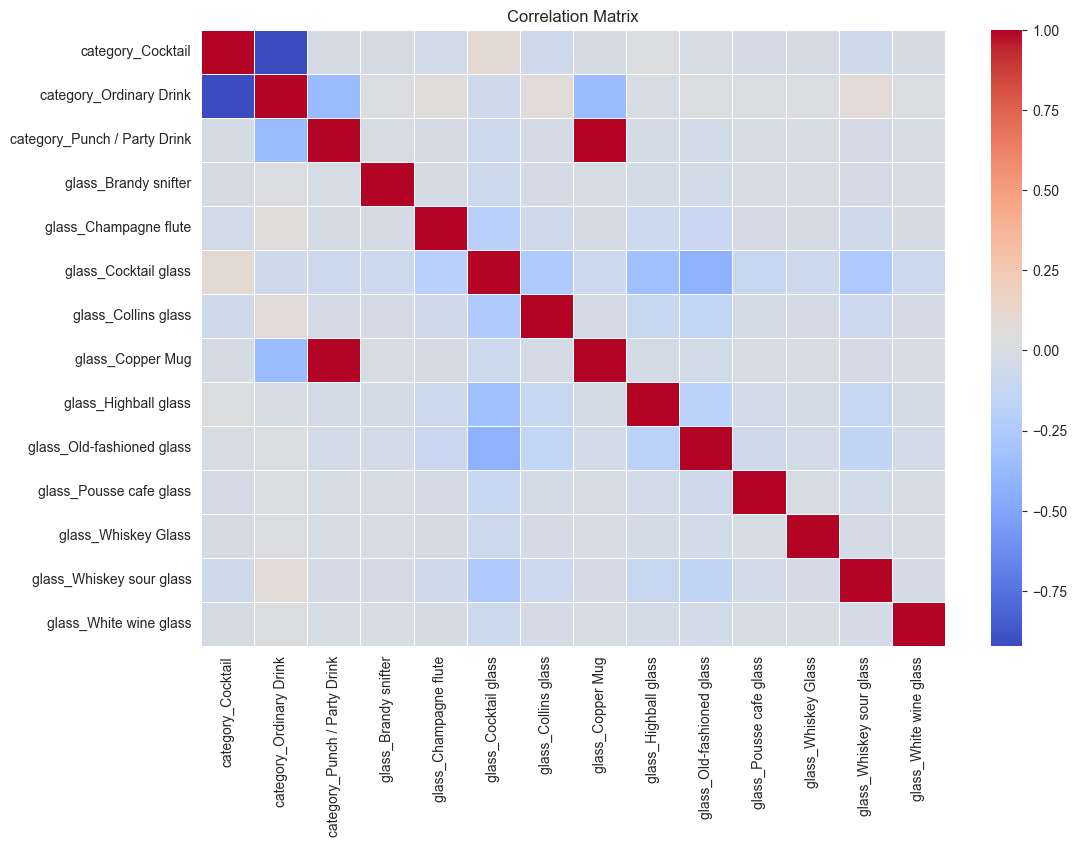

In [53]:
correlation_matrix = df_ohe.corr()

print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()